HANA TITANIA SASTRIAN 23083010056 ANALISIS DATA EKSPLORATIF A

In [1]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

file_name = 'ProductPriceIndex.csv'

df = pd.read_csv(file_name, delimiter=';')

price_columns = ['farmprice', 'atlantaretail', 'chicagoretail', 'losangelesretail', 'newyorkretail', 'averagespread']

for column in price_columns:
    if column != 'averagespread':
        df[column] = pd.to_numeric(df[column].replace('[$,]', '', regex=True), errors='coerce')
    else:
        df[column] = pd.to_numeric(df[column].replace('[\%,]', '', regex=True), errors='coerce')

df['date'] = pd.to_datetime(df['date'], errors='coerce', dayfirst=True)

print(df.head())



Saving ProductPriceIndex.csv to ProductPriceIndex.csv
        productname       date  farmprice  atlantaretail  chicagoretail  \
0      Strawberries 2019-05-19       1.16           2.23           1.70   
1   Romaine Lettuce 2019-05-19       0.35           1.72           2.00   
2  Red Leaf Lettuce 2019-05-19       0.32           1.84           1.84   
3          Potatoes 2019-05-19       1.50           5.32           5.14   
4           Oranges 2019-05-19       0.41           1.42           1.45   

   losangelesretail  newyorkretail  averagespread  
0              1.99           2.54          82.33  
1              1.69           1.99         428.57  
2              1.69           1.89         467.19  
3              3.99           6.22         244.50  
4              1.34           2.05         281.71  


VARIABEL NUMERIK

In [6]:
# Kolom numerik dan kategorikal yang relevan berdasarkan dataset yang kamu berikan
price_columns = ['farmprice', 'atlantaretail', 'chicagoretail', 'losangelesretail', 'newyorkretail', 'averagespread']
categorical_columns = ['productname', 'Date']



Analisis distribusi untuk kolom: farmprice


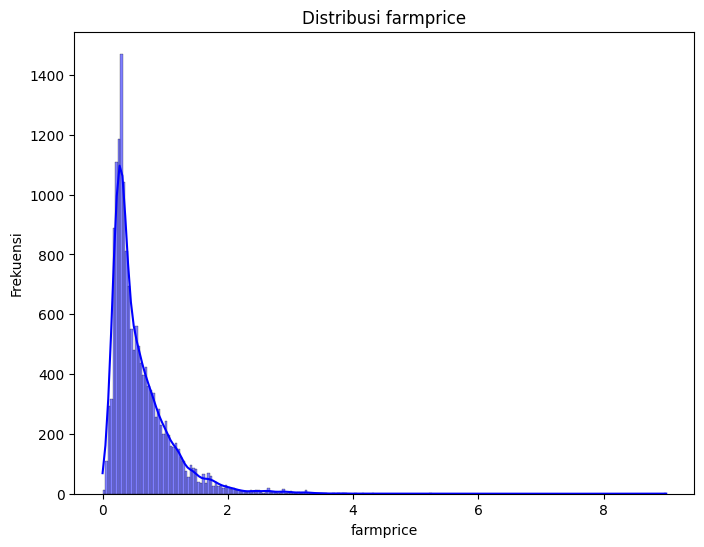

Rata-rata: 0.5953434823977165
Median: 0.43
Deviasi Standar: 0.48291814850234377
Skewness: 2.4543992650855806
Kategori distribusi: Distribusi sangat miring ke kanan

Analisis distribusi untuk kolom: atlantaretail


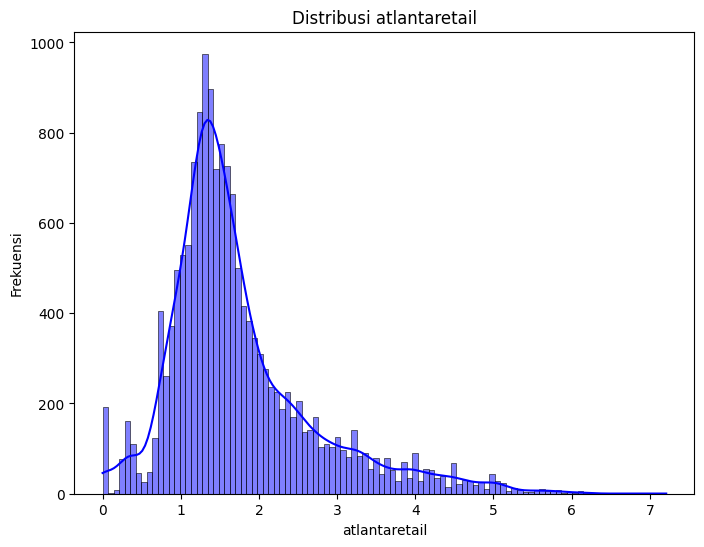

Rata-rata: 1.7560171265461466
Median: 1.51
Deviasi Standar: 0.9586521232378664
Skewness: 1.4401510481075859
Kategori distribusi: Distribusi sangat miring ke kanan

Analisis distribusi untuk kolom: chicagoretail


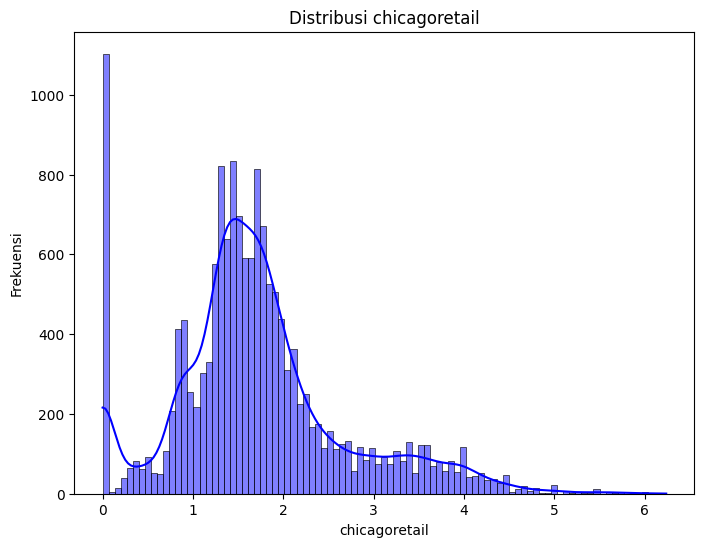

Rata-rata: 1.7164321958645186
Median: 1.61
Deviasi Standar: 0.969735699587626
Skewness: 0.7745996979730705
Kategori distribusi: Distribusi miring ke kanan

Analisis distribusi untuk kolom: losangelesretail


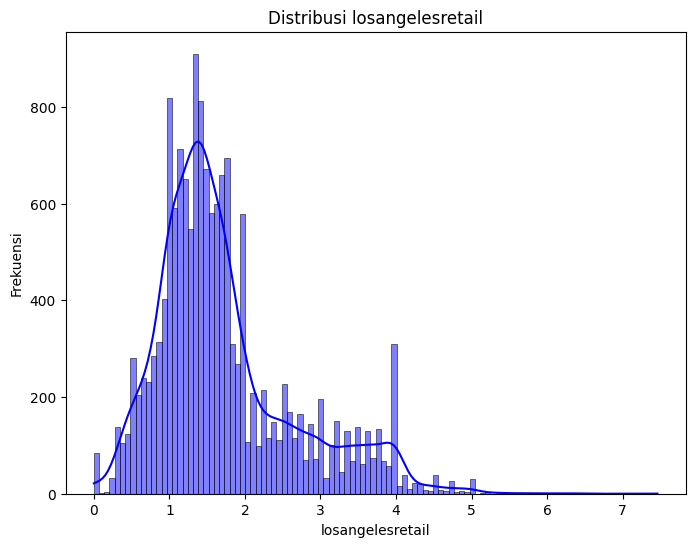

Rata-rata: 1.7212025878472665
Median: 1.49
Deviasi Standar: 0.9251662676682688
Skewness: 1.1623830246444904
Kategori distribusi: Distribusi sangat miring ke kanan

Analisis distribusi untuk kolom: newyorkretail


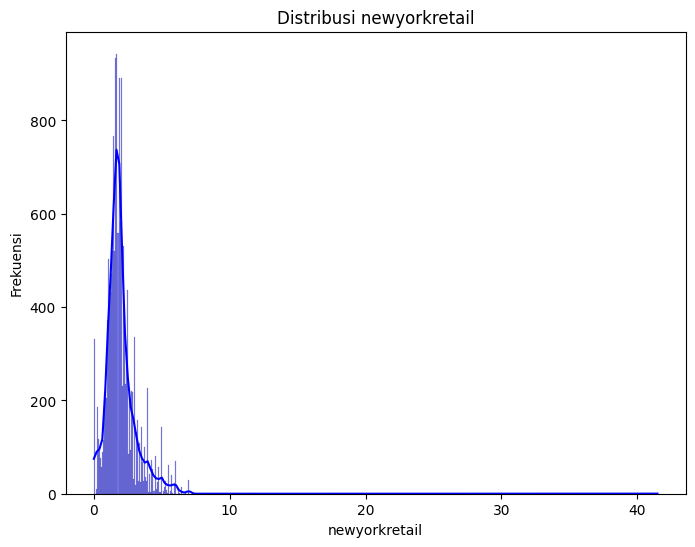

Rata-rata: 1.9734338113973857
Median: 1.79
Deviasi Standar: 1.1230358015066644
Skewness: 4.0301976721485175
Kategori distribusi: Distribusi sangat miring ke kanan

Analisis distribusi untuk kolom: averagespread


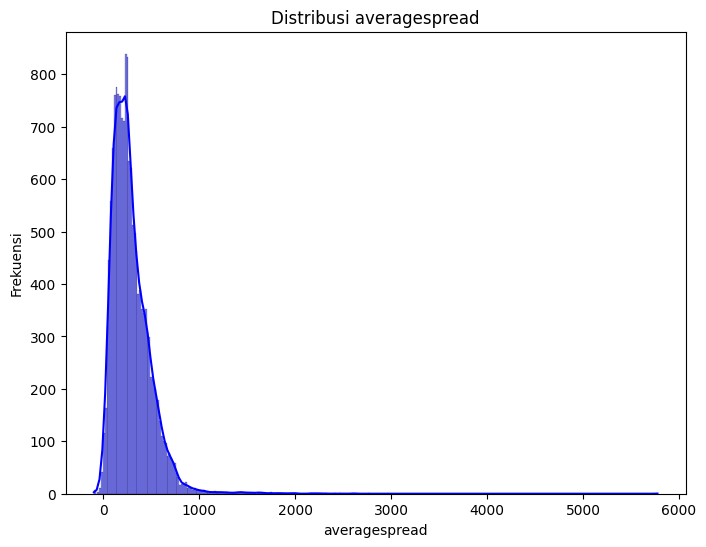

Rata-rata: 289.2514607382976
Median: 246.04
Deviasi Standar: 211.58638331363912
Skewness: 3.5045458725281806
Kategori distribusi: Distribusi sangat miring ke kanan

Analisis distribusi untuk kolom: productname


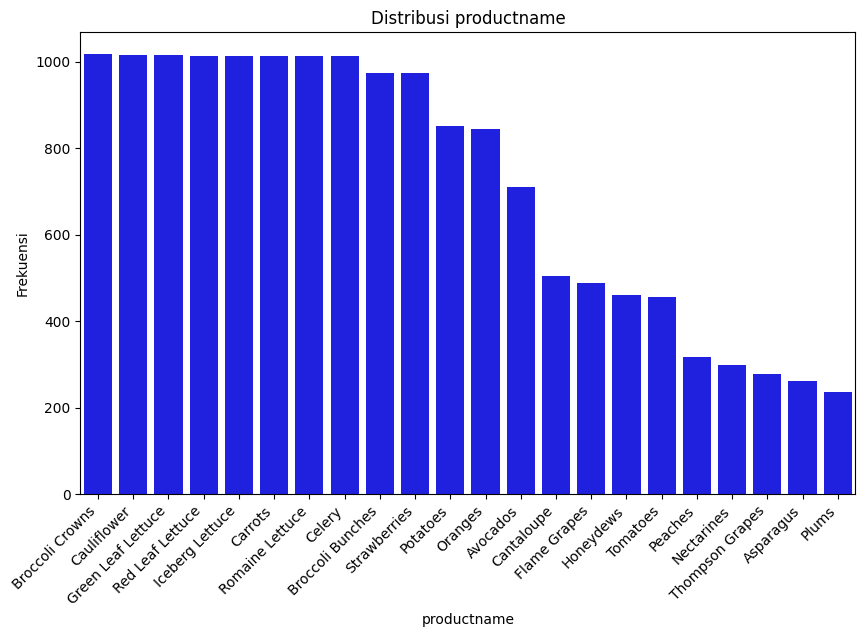


Analisis distribusi untuk kolom: date


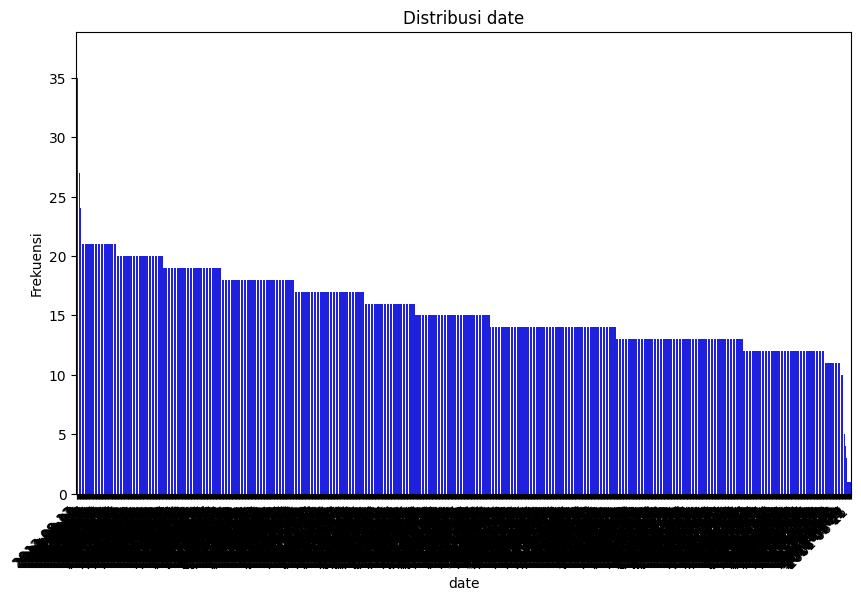

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Kolom numerik dan kategorikal yang relevan berdasarkan dataset yang kamu berikan
price_columns = ['farmprice', 'atlantaretail', 'chicagoretail', 'losangelesretail', 'newyorkretail', 'averagespread']
categorical_columns = ['productname', 'date']

# 1. Visualisasi untuk variabel numerik
for col in price_columns:
    print(f"\nAnalisis distribusi untuk kolom: {col}")

    # Visualisasi Histogram untuk distribusi
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, color='blue')  # Mengganti warna menjadi biru
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()

    # 2. Menghitung pemusatan dan penyebaran
    mean_value = df[col].mean()
    median_value = df[col].median()
    std_dev = df[col].std()

    print(f'Rata-rata: {mean_value}')
    print(f'Median: {median_value}')
    print(f'Deviasi Standar: {std_dev}')

    # 3. Menghitung Skewness
    data_skewness = skew(df[col].dropna())  # Menghindari nilai NaN
    print(f'Skewness: {data_skewness}')

    # 4. Menentukan kategori distribusi berdasarkan skewness
    if data_skewness < -1:
        distribution = "Distribusi sangat miring ke kiri"
    elif -1 <= data_skewness < 0:
        distribution = "Distribusi miring ke kiri"
    elif 0 < data_skewness <= 1:
        distribution = "Distribusi miring ke kanan"
    else:
        distribution = "Distribusi sangat miring ke kanan"

    print(f'Kategori distribusi: {distribution}')

# 5. Visualisasi untuk variabel kategorikal
for col in categorical_columns:
    print(f"\nAnalisis distribusi untuk kolom: {col}")

    # Visualisasi Count Plot untuk kategori
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[col], order=df[col].value_counts().index, color='blue')  # Mengganti warna menjadi biru
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.xticks(rotation=45, ha='right')
    plt.show()


**IDENTIFIKASI DISTRIBUSI SETIAP VARIABEL PADA DATA PRODUK PERTANIAN DI BERBAGAI KOTA DI AMERIKA SERIKAT**

1. **Product Name (Distribusi Nominal)**  
   - Variabel ini mencakup nama-nama produk seperti buah dan sayuran. Ini mengikuti distribusi nominal karena setiap produk memiliki kategori unik yang tidak ada urutan tertentu.

2. **Farm Price (Distribusi Normal atau Eksponensial)**  
   - Harga produk di tingkat petani kemungkinan besar mengikuti distribusi normal jika mayoritas harga berpusat di sekitar rata-rata. Namun, jika harga menunjukkan pola dengan sedikit harga yang sangat tinggi atau rendah, distribusi eksponensial bisa terjadi.

3. **Atlanta Retail (Distribusi Normal atau Eksponensial)**  
   - Harga ritel di Atlanta juga mungkin mengikuti distribusi normal jika sebagian besar harga berpusat di nilai rata-rata. Sebaliknya, jika ada perbedaan harga yang signifikan, distribusi eksponensial mungkin lebih sesuai.

4. **Chicago Retail (Distribusi Normal atau Eksponensial)**  
   - Sama seperti Atlanta, harga ritel di Chicago cenderung mengikuti distribusi normal. Jika ada variabilitas harga yang tinggi di ujung tertentu, ini bisa mengikuti distribusi eksponensial.

5. **Los Angeles Retail (Distribusi Normal atau Eksponensial)**  
   - Harga ritel di Los Angeles dapat mengikuti distribusi normal dengan sebagian besar harga berada di sekitar nilai rata-rata. Namun, jika terdapat fluktuasi besar, distribusi eksponensial mungkin lebih cocok.

6. **New York Retail (Distribusi Normal atau Eksponensial)**  
   - Harga ritel di New York kemungkinan besar juga mengikuti distribusi normal, dengan harga berpusat di sekitar rata-rata. Jika harga menunjukkan pola yang menurun tajam, distribusi eksponensial bisa terjadi.

7. **Average Spread (Distribusi Normal atau Eksponensial)**  
   - Spread harga rata-rata antara tingkat petani dan ritel dapat mengikuti distribusi normal jika spread tersebut cukup merata. Jika spread menunjukkan distribusi dengan sedikit nilai spread yang sangat tinggi atau rendah, distribusi eksponensial bisa lebih cocok.

8. **Date (Distribusi Uniform)**  
   - Tanggal transaksi mengikuti distribusi uniform karena setiap tanggal dalam rentang waktu yang ada memiliki probabilitas yang sama untuk muncul.

Kesimpulannya, sebagian besar variabel harga (baik harga petani maupun harga ritel di berbagai kota) kemungkinan besar mengikuti distribusi normal, tetapi bisa juga eksponensial jika ada ketidakseimbangan besar dalam harga. Sementara itu, variabel tanggal mengikuti distribusi uniform, dan nama produk mengikuti distribusi nominal.